In [19]:
import pandas as pd

In [2]:
fuelsalesdata = pd.read_csv('/Users/franzhaidacher/Downloads/FuelSalesDataSample.csv')

In [3]:
fuelsalesdata.head()

,Date,Weekday,Hour,SiteID,SiteName,Grade,Pump,ServiceType,VolumeSold,PaymentType,UnitPrice,TotalSale
0,1/1/2017,7,0,6601,Falls Church,REGULAR,1,FULL,7.40,CASH,$2.78,$20.57
1,1/1/2017,7,0,6601,Falls Church,REGULAR,3,FULL,11.03,CASH,$2.78,$30.66
2,1/1/2017,7,0,6601,Falls Church,REGULAR,5,FULL,11.70,CREDIT CARD,$2.78,$32.53
3,1/1/2017,7,0,6601,Falls Church,REGULAR,7,SELF,15.68,CASH,$2.73,$42.81
4,1/1/2017,7,0,6601,Falls Church,DIESEL,7,SELF,4.51,CREDIT CARD,$2.87,$12.94


In [4]:
fuelsalesdata.describe

<bound method NDFrame.describe of             Date  Weekday  Hour  SiteID         SiteName    Grade  Pump  \
0       1/1/2017        7     0    6601     Falls Church  REGULAR     1   
1       1/1/2017        7     0    6601     Falls Church  REGULAR     3   
2       1/1/2017        7     0    6601     Falls Church  REGULAR     5   
3       1/1/2017        7     0    6601     Falls Church  REGULAR     7   
4       1/1/2017        7     0    6601     Falls Church   DIESEL     7   
5       1/1/2017        7     1    6601     Falls Church  REGULAR     1   
6       1/1/2017        7     1    6601     Falls Church  REGULAR     3   
7       1/1/2017        7     1    6601     Falls Church  REGULAR     5   
8       1/1/2017        7     1    6601     Falls Church  REGULAR     7   
9       1/1/2017        7     2    6601     Falls Church  REGULAR     1   
10      1/1/2017        7     2    6601     Falls Church  REGULAR     3   
11      1/1/2017        7     2    6601     Falls Church  REGULAR 

In [5]:
fuelsalesdata.hour.unique()

AttributeError: 'DataFrame' object has no attribute 'hour'

In [6]:
fuelsalesdata.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [7]:
len(fuelsalesdata.Hour.unique())

24

In [3]:
fuelsalesdata.PaymentType.unique()

array(['CASH', 'CREDIT CARD', 'CREDIT CUSTOMER', 'DRIVE OFF'], dtype=object)

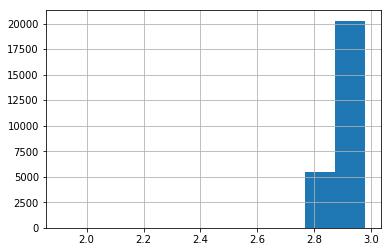

In [20]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline
import matplotlib.pyplot as plt
fuelsalesdata.loc[fuelsalesdata['Grade'] == 'DIESEL', 'UnitPrice'].hist()

In [50]:
plt.figure(figsize=(20,10))

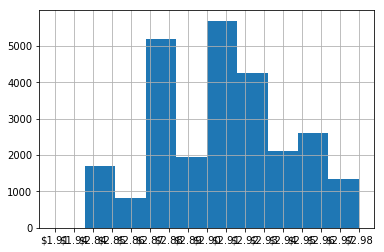

In [51]:
fuelsalesdata.loc[fuelsalesdata['Grade'] == 'DIESEL', 'UnitPrice'].hist()

In [13]:
import seaborn as sb

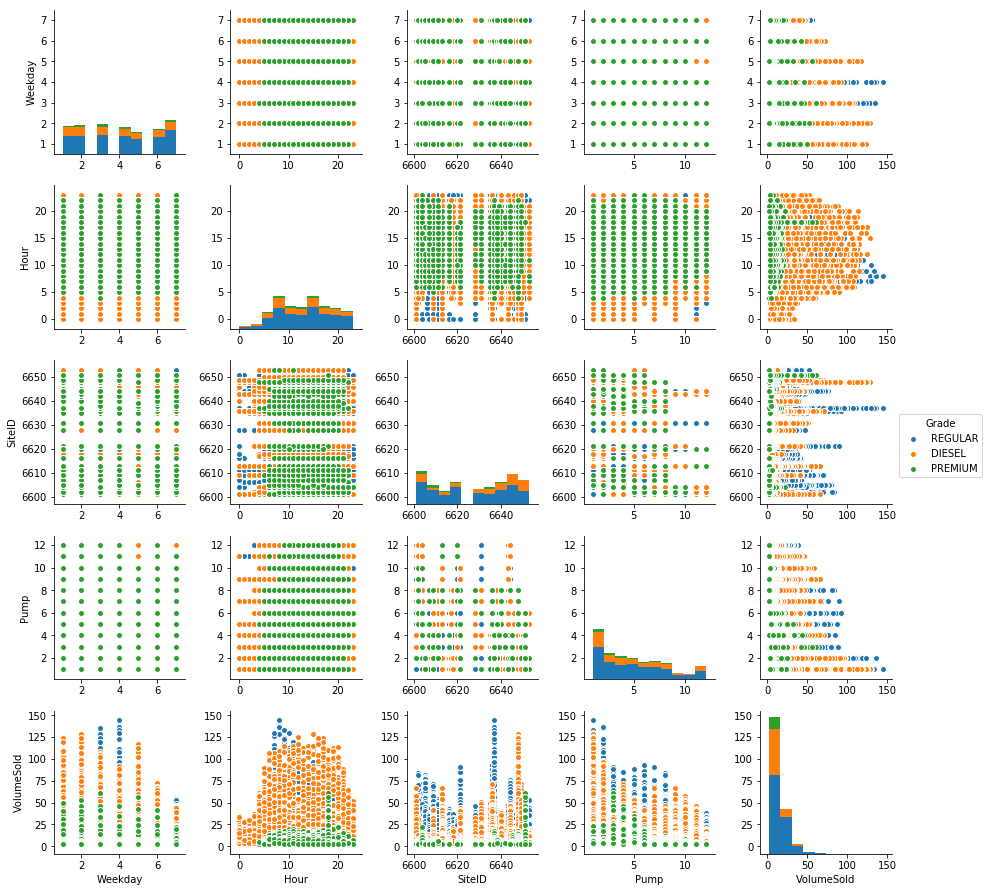

In [14]:
sb.pairplot(fuelsalesdata.dropna(), hue='Grade')

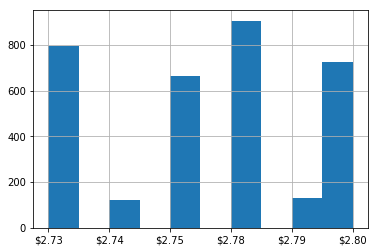

In [18]:
fuelsalesdata.loc[(fuelsalesdata['Grade'] == 'REGULAR') & (fuelsalesdata['SiteID'] == 6601), 'UnitPrice'].hist()

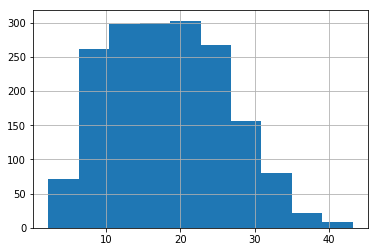

In [26]:
fuelsalesdata.loc[(fuelsalesdata['Grade'] == 'REGULAR') & (fuelsalesdata['SiteID'] == 6601) & (fuelsalesdata['ServiceType'] == 'FULL'), 'VolumeSold'].hist()

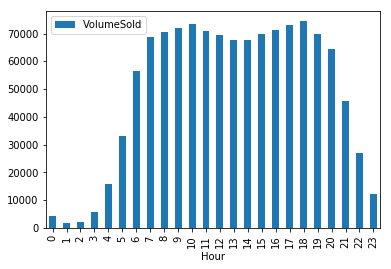

In [40]:
fuelsalesdata.groupby('Hour').sum().plot(y='VolumeSold', kind = 'bar')

In [44]:
fuelsalesdata_filtered = fuelsalesdata.query('SiteID==6601')

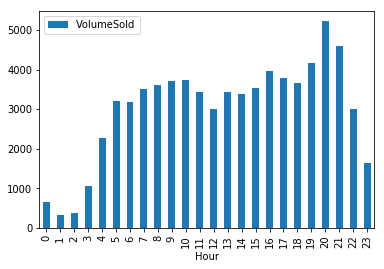

In [45]:
fuelsalesdata_filtered.groupby('Hour').sum().plot(y='VolumeSold', kind = 'bar')

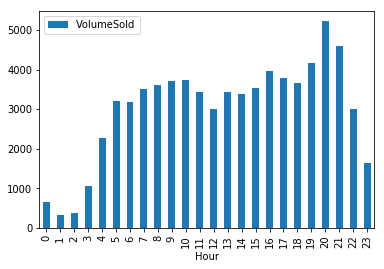

In [46]:
# use method chaining
fuelsalesdata.query('SiteID==6601').groupby('Hour').sum().plot(y='VolumeSold', kind = 'bar')

In [5]:
fuelsalesdata_filtered = fuelsalesdata.query('PaymentType=="DRIVE OFF"')

In [6]:
fuelsalesdata_filtered

,Date,Weekday,Hour,SiteID,SiteName,Grade,Pump,ServiceType,VolumeSold,PaymentType,UnitPrice,TotalSale
14927,1/3/2017,2,17,6618,Quincy Drive,DIESEL,2,SELF,14.52,DRIVE OFF,$2.89,$41.96
32209,1/5/2017,4,19,6653,Brussels Avenue,DIESEL,5,SELF,11.45,DRIVE OFF,$2.88,$32.98
32799,1/6/2017,5,22,6604,Oakland Road,REGULAR,11,SELF,9.43,DRIVE OFF,$2.71,$25.56
36121,1/7/2017,6,18,6601,Falls Church,REGULAR,10,SELF,7.95,DRIVE OFF,$2.73,$21.70
37720,1/7/2017,6,21,6617,Reagan Street,REGULAR,7,SELF,8.63,DRIVE OFF,$2.70,$23.30
38008,1/7/2017,6,4,6628,Norway Market,REGULAR,7,FULL,8.65,DRIVE OFF,$2.77,$23.96
66689,1/12/2017,4,21,6617,Reagan Street,REGULAR,7,SELF,8.44,DRIVE OFF,$2.72,$22.96
71765,1/13/2017,5,21,6604,Oakland Road,PREMIUM,5,FULL,7.67,DRIVE OFF,$3.04,$23.32
75563,1/13/2017,5,6,6643,Highland View,DIESEL,10,SELF,9.73,DRIVE OFF,$2.91,$28.31
89133,1/15/2017,7,23,6648,Legacy Way,REGULAR,7,SELF,11.97,DRIVE OFF,$2.74,$32.80


In [14]:
fuelsalesdata_filtered = fuelsalesdata.query('SiteID==6601')

In [10]:
fuelsalesdata['UnitPrice']=fuelsalesdata['UnitPrice'].str.replace('$',' ')
fuelsalesdata['UnitPrice']=pd.to_numeric(fuelsalesdata['UnitPrice'])

In [52]:
fuelsalesdata_filtered = fuelsalesdata.query('SiteID==6602 & Grade=="REGULAR"')

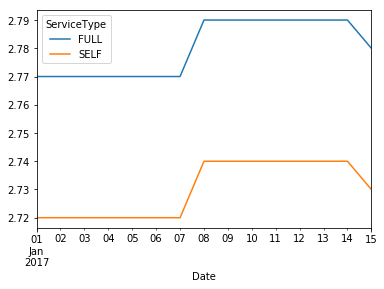

In [53]:
fuelsalesdata_filtered.groupby(['Date','ServiceType']).mean().unstack('ServiceType').plot(y='UnitPrice')

In [32]:
import datetime

In [33]:
fuelsalesdata['Date']=pd.to_datetime(fuelsalesdata['Date'])